In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../scripts')

from helpers import summarize_df, flag_outliers_zscore, fill_missing, line_plot, scatter_plot, heatmap_corr, histogram

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
#------------- Step 1:  Load Data -------------
df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
# ------------- Step 2: Summary & Missing Values -------------
summarize_df(df)

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  in

In [5]:
# ------------- Step 3: Outlier Detection -------------
cols_to_check = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
outliers_mask = flag_outliers_zscore(df, cols_to_check, threshold=3)
print(outliers_mask.sum())


GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


In [6]:
# ------------- Step 4: Handle Missing Values -------------
df = fill_missing(df, cols_to_check, method='median')
print(df.shape)
df.info()
df.describe()
df.isna().sum()

(525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64  

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# remove extreme outliers
for col in cols_to_check:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    df = df[z_scores <= 3]


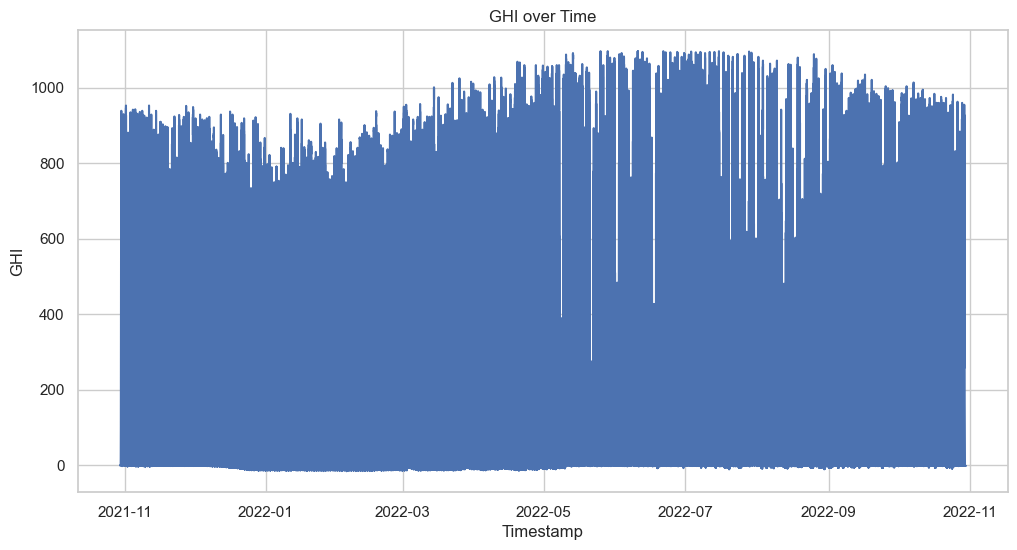

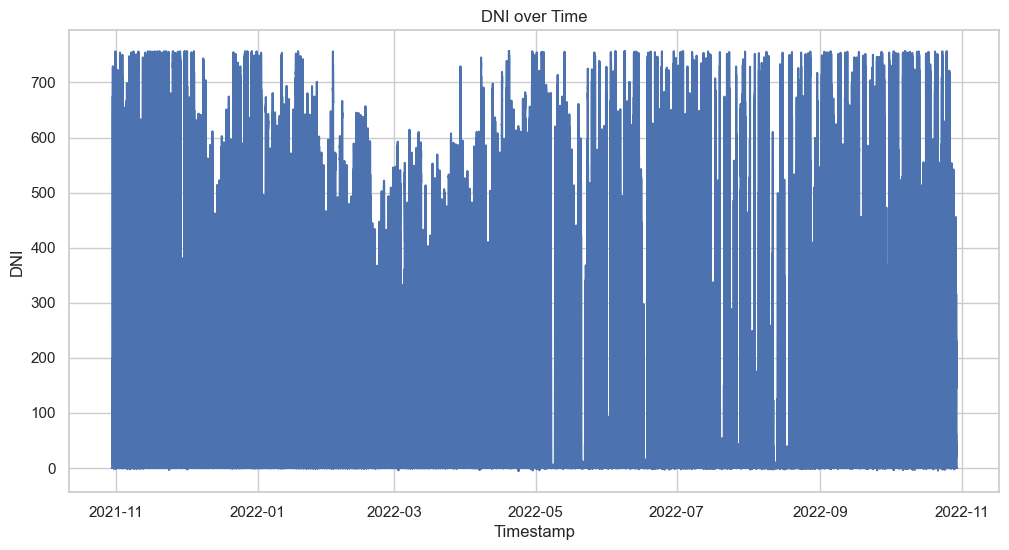

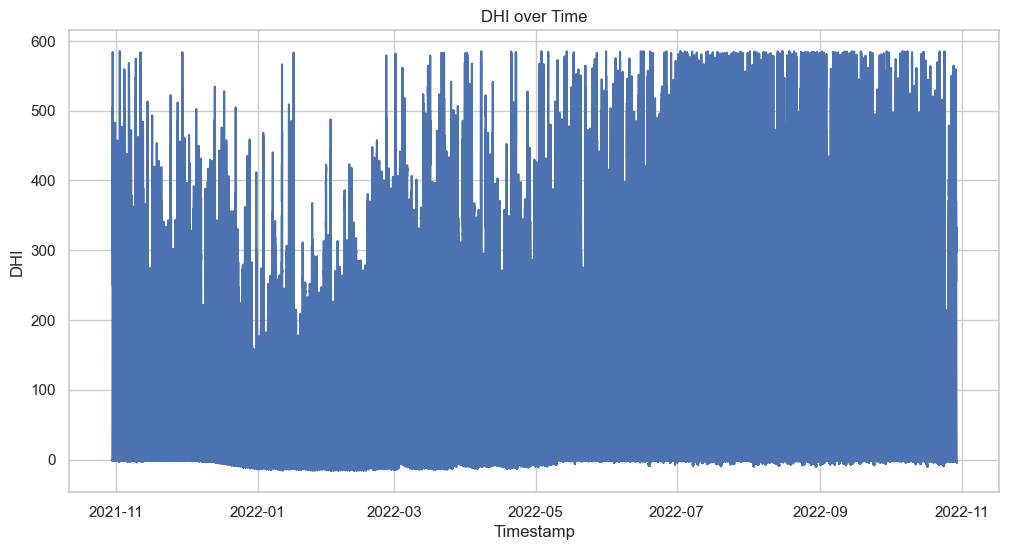

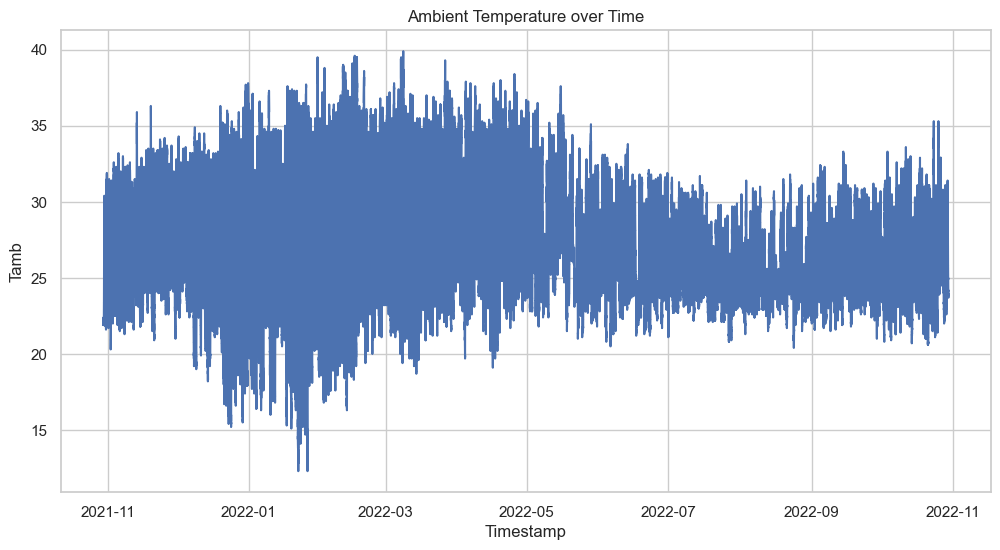

In [8]:
# ------------- Step 5: Time Series Visualization -------------
for col in ['GHI','DNI','DHI']:
    line_plot(df, x='Timestamp', y=col, title=f'{col} over Time')

line_plot(df, x='Timestamp', y='Tamb', title='Ambient Temperature over Time')


c:\Users\a_kas\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


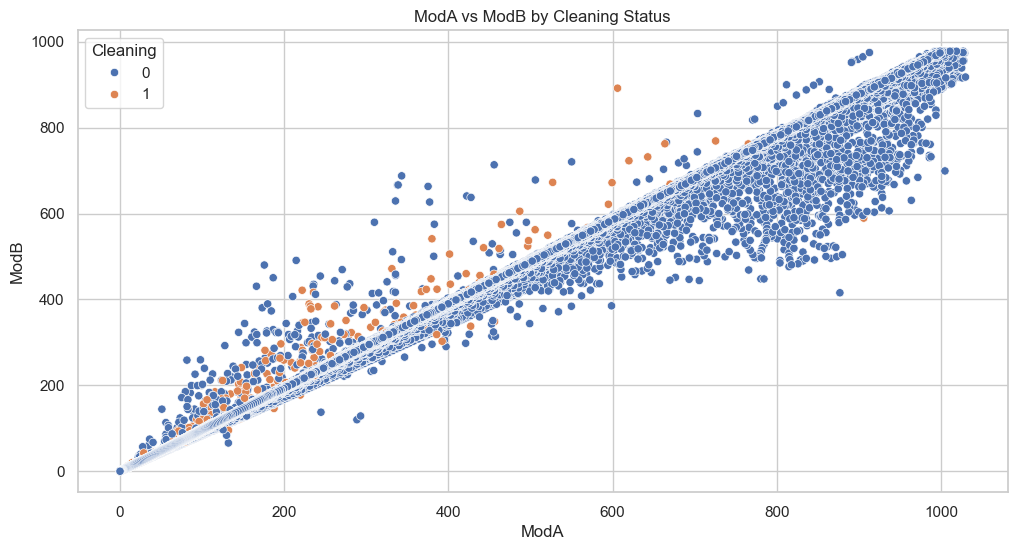

In [9]:
# ------------- Step 6: Cleaning Impact -------------
df.groupby('Cleaning')[['ModA','ModB']].mean()
scatter_plot(df, x='ModA', y='ModB', hue='Cleaning', title='ModA vs ModB by Cleaning Status')


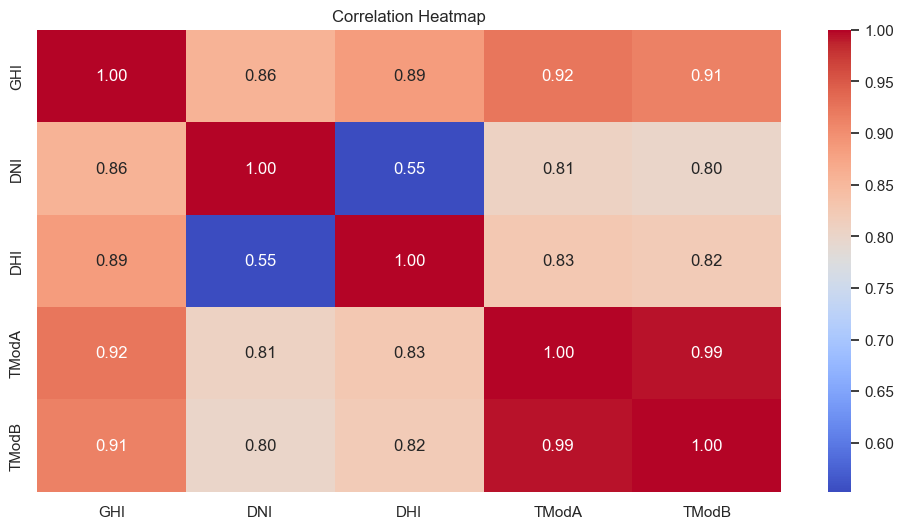

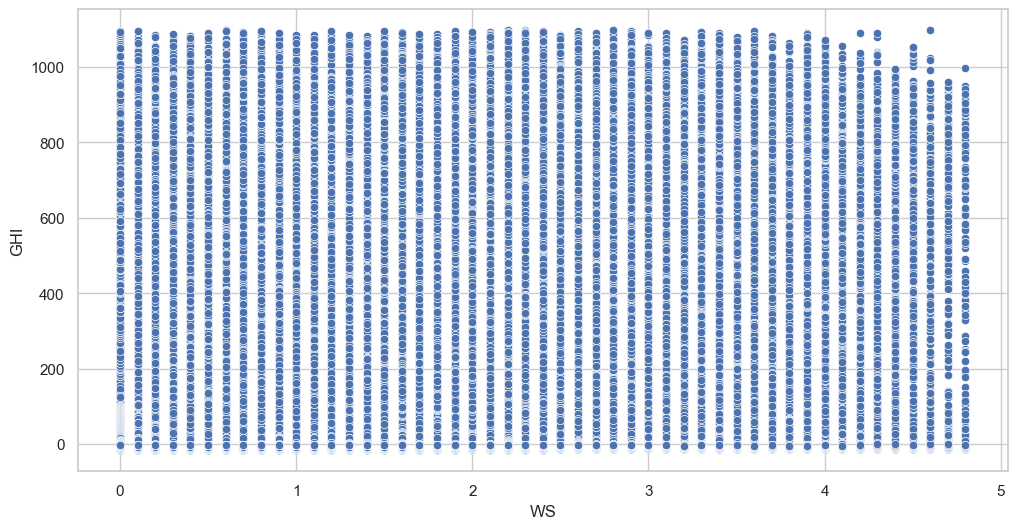

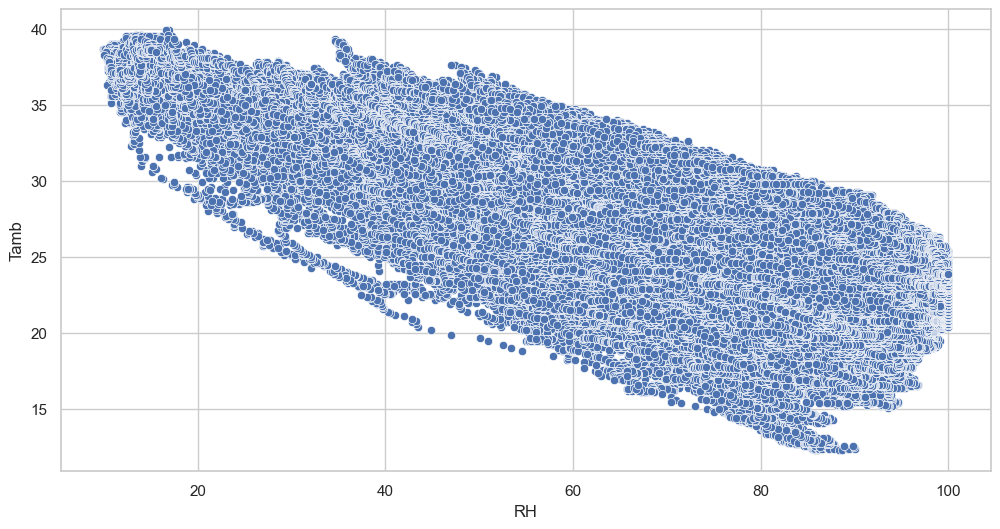

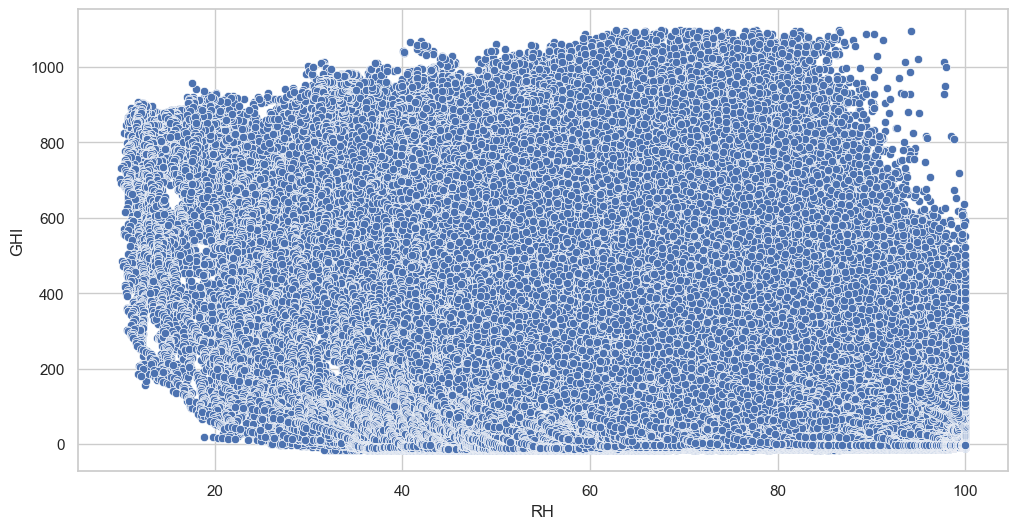

In [10]:
# ------------- Step 7: Correlations & Relationships -------------
heatmap_corr(df, ['GHI','DNI','DHI','TModA','TModB'])
scatter_plot(df, x='WS', y='GHI')
scatter_plot(df, x='RH', y='Tamb')
scatter_plot(df, x='RH', y='GHI')


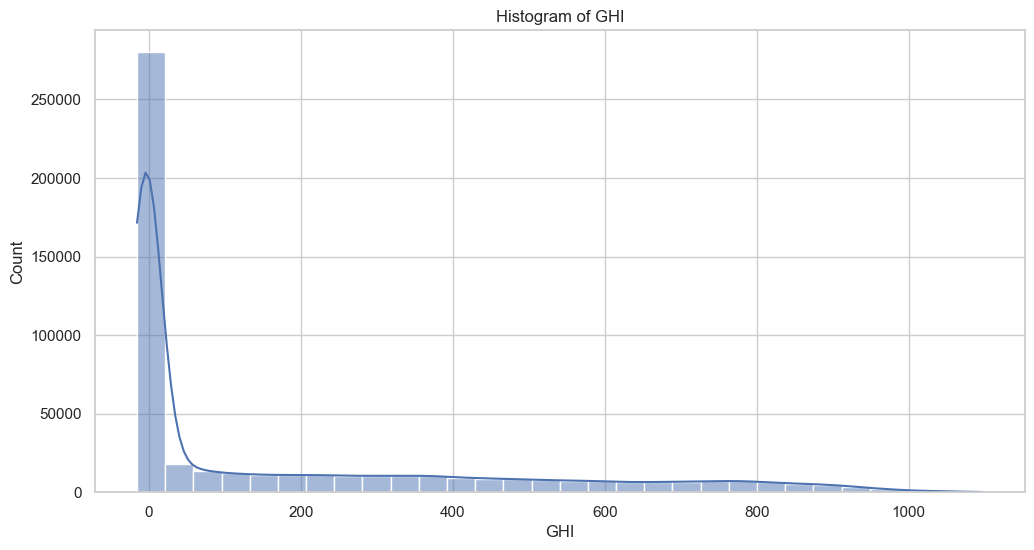

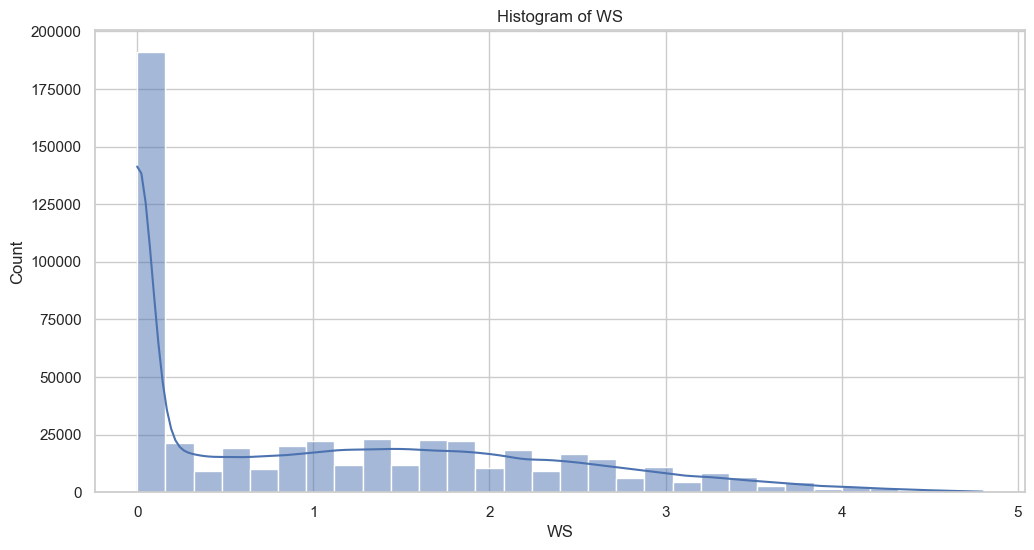

In [11]:
# ------------- Step 8: Wind & Distribution Analysis -------------
histogram(df, 'GHI')
histogram(df, 'WS')


c:\Users\a_kas\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


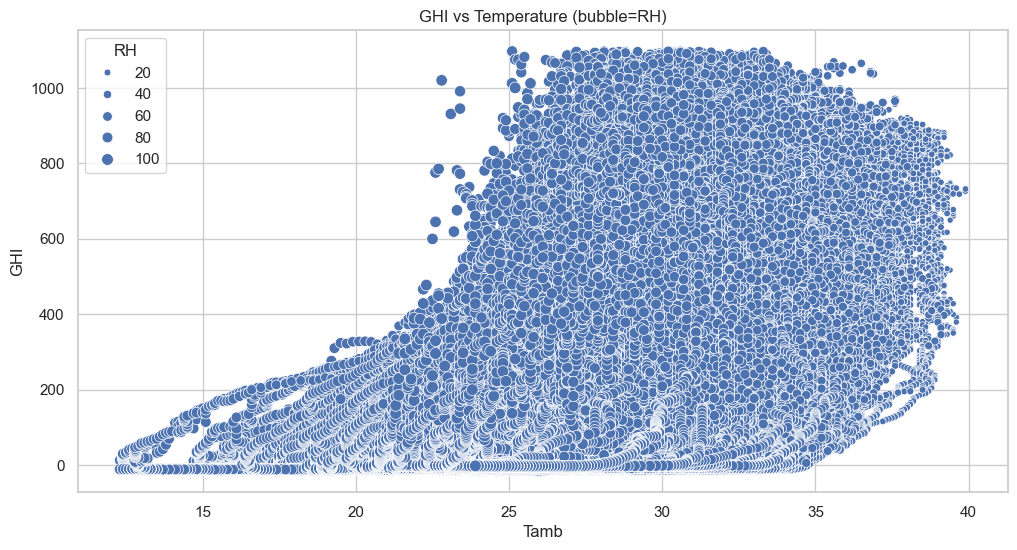

In [12]:
# ------------- Step 9: Bubble Chart -------------
scatter_plot(df, x='Tamb', y='GHI', size='RH', title='GHI vs Temperature (bubble=RH)')


In [13]:
# ------------- Step 10: Save Cleaned CSV -------------
df.to_csv('../data/sierraleone_clean.csv', index=False)
df_clean = pd.read_csv('../data/sierraleone_clean.csv', parse_dates=['Timestamp'])
df_clean.head()
df_clean.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         504953
dtype: int64